# **Predictive Analytics** : Diagnosa Kanker Pankreas Berdasarkan Biomarker Urin
---
Oleh : [Yusuf Sugiono](https://dicoding.com/users/yusufsugiono)

![Infographics: Pancreatic Cancer, medindia.net](https://www.medindia.net/images/common/infographics/article-images/950_400/pancreatic-cancer-infographic.jpg)

## Pendahuluan

- Latar Belakang  
Kanker pankreas adalah jenis kanker yang sangat mematikan. Setelah didiagnosis, tingkat kelangsungan hidup lima tahun kurang dari 10%. Namun, jika kanker pankreas terdeteksi lebih awal, kemungkinan bertahan hidup jauh lebih baik. Sayangnya, banyak kasus kanker pankreas tidak menunjukkan gejala hingga kanker menyebar ke seluruh tubuh. Tes diagnostik untuk mengidentifikasi orang dengan kanker pankreas bisa sangat membantu.

## Penyiapan Data

### Mengimpor Library

In [1]:
# Import Library
from google.colab import files
import os
import zipfile
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Menyiapkan Kredensial Kaggle

Dataset yang akan dipakai dalam proyek ini diambil dari platform Kaggle. Maka dari itu, sebelum dapat mengunduh data, harus mengunggah kredensial berupa file JSON yang dapat di-generate melalui profil akun Kaggle. 

In [2]:
# Upload kaggle.json
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(
      name=fn))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json"


In [3]:
# Ubah permission file
!chmod 600 /content/kaggle.json

In [4]:
# Setup Kaggle environment
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

### Mengunduh Dataset

![Urinary biomarkers for pancreatic cancer dataset](https://i.postimg.cc/G2T1WCB3/Screenshot-6.png)

Informasi Dataset:

Jenis | Keterangan
--- | ---
Title | Urinary biomarkers for pancreatic cancer
Source | [Kaggle](https://www.kaggle.com/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer)
Maintainer | [John Davis](https://www.kaggle.com/johnjdavisiv)
License | Data files © Original Authors
Visibility | Public
Tags | biology, cancer, health conditions, beginner, binary classification, medicine
Usability | 10.0

In [5]:
# Download dataset
!kaggle datasets download -d johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer

  0% 0.00/18.0k [00:00<?, ?B/s]
100% 18.0k/18.0k [00:00<00:00, 7.01MB/s]


In [6]:
# melakukan ekstraksi pada file zip
local_zip = 'urinary-biomarkers-for-pancreatic-cancer.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/urinary-biomarkers-for-pancreatic-cancer/')
zip_ref.close()

In [7]:
# Menghapus berkas zip yang sudah tidak diperlukan
!rm urinary-biomarkers-for-pancreatic-cancer.zip

## Data Understanding

Langkah pertama untuk memahami data yaitu dengan melihat isi dari direktori dataset yang telah diunduh

In [8]:
# Cek isi direktori dataset
os.listdir('/content/urinary-biomarkers-for-pancreatic-cancer')

['Debernardi et al 2020 documentation.csv', 'Debernardi et al 2020 data.csv']

Dari keluaran di atas, dapat diketahui bahwa ada dua berkas data, diantaranya adalah dataset utama dan berkas lainnya adalah merupakan dokumentasi.

Mari kita lihat data dokumentasinya dengan menggunakan `pandas`

In [9]:
# Cek dokumentasi dataset
data_docs = pd.read_csv('/content/urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 documentation.csv')
data_docs

,Column name,Original column name,Details
0,sample_id,Sample ID,Unique string identifying each subject
1,patient_cohort,Patient's Cohort,"Cohort 1, previously used samples; Cohort 2, ..."
2,sample_origin,Sample Origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ..."
3,age,Age,Age in years
4,sex,Sex,"M = male, F = female"
5,diagnosis,"Diagnosis (1=Control, 2=Benign, 3=PDAC)","1 = control (no pancreatic disease), 2 = benig..."
6,stage,Stage,"For those with pancratic cancer, what stage wa..."
7,benign_sample_diagnosis,Benign Samples Diagnosis,"For those with a benign, non-cancerous diagnos..."
8,plasma_CA19_9,Plasma CA19-9 U/ml,Blood plasma levels of CA 19–9 monoclonal anti...
9,creatinine,Creatinine mg/ml,Urinary biomarker of kidney function


Dari keluaran di atas, menunjukkan bahwa dokumentasi ini berisi fitur yang ada pada dataset beserta penjelasannya. Namun string yang terlalu panjang terpotong dan tidak dapat dibaca dengan baik. Untuk itu perlu menyesuaikan lebar kolom terlebih dahulu untuk memunculkan semua teksnya.

In [10]:
# Cek ukuran lebar kolom
pd.options.display.max_colwidth

50

In [11]:
# Memperlebar ukuran kolom
pd.options.display.max_colwidth = 500

In [12]:
data_docs

,Column name,Original column name,Details
0,sample_id,Sample ID,Unique string identifying each subject
1,patient_cohort,Patient's Cohort,"Cohort 1, previously used samples; Cohort 2, newly added samples"
2,sample_origin,Sample Origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ESP: Spanish National Cancer Research Centre, Madrid, Spain; LIV: Liverpool University, UK; UCL: University College London, UK"
3,age,Age,Age in years
4,sex,Sex,"M = male, F = female"
5,diagnosis,"Diagnosis (1=Control, 2=Benign, 3=PDAC)","1 = control (no pancreatic disease), 2 = benign hepatobiliary disease (119 of which are chronic pancreatitis); 3 = Pancreatic ductal adenocarcinoma, i.e. pancreatic cancer"
6,stage,Stage,"For those with pancratic cancer, what stage was it? One of IA, IB, IIA, IIIB, III, IV"
7,benign_sample_diagnosis,Benign Samples Diagnosis,"For those with a benign, non-cancerous diagnosis, what was the diagnosis?"
8,plasma_CA19_9,Plasma CA19-9 U/ml,Blood plasma levels of CA 19–9 monoclonal antibody that is often elevated in patients with pancreatic cancer. Only assessed in 350 patients (one goal of the study was to compare various CA 19-9 cutpoints from a blood sample to the model developed using urinary samples).
9,creatinine,Creatinine mg/ml,Urinary biomarker of kidney function


Dari dataframe di atas kita dapat melihat bahwa pada dataset ini terdapat 14 kolom. Diantaranya:

1. `sample_id` : merupakan string unik yang mengidentifikasi setiap subjek
2. `patient_cohort` : menyatakan kelompok pasien, memiliki 2 nilai, yaitu *Cohort 1*, sampel yang sebelumnya digunakan; *Cohort 2*, sampel yang baru ditambahkan
3. `sample_origin` : menyatakan sumber sampel data
4. `age` : menyatakan usia pasien dalam tahun
5. `sex` : menyatakan jenis kelamin pasien (M=Pria, F=Wanita)
6. `diagnosis` : menyatakan diagnosis (1=sehat, 2=benign hepatobiliary disease/bukan kanker, 3=kanker pankreas)
7. `stage` : menyatakan tingkat kanker pankreas yang diderita pasien (IA, IB, IIA, IIIB, III, IV)
8. `benign_sample_diagnosis` : diagnosis untuk mereka penderita benign hepatobiliary disease / non-kanker
9. `plasma_CA19_9` : Kadar plasma darah dari antibodi monoklonal CA 19-9 yang sering meningkat pada pasien dengan kanker pankreas. 
10. `creatinine	` : Biomarker urin dari fungsi ginjal
11. `LYVE1` : Tingkat urin reseptor *Lymphatic vessel endothelial hyaluronan* 1, protein yang mungkin berperan dalam metastasis tumor
12. `REG1B` : Kadar protein urin yang mungkin terkait dengan regenerasi pankreas
13. `TFF1` : Tingkat urin *Trefoil Factor* 1, yang mungkin terkait dengan regenerasi dan perbaikan saluran kemih.
14. `REG1A` : Kadar protein urin yang mungkin berhubungan dengan regenerasi pankreas.

Kita dapat melihat isi dari datasetnya menggunakan pandas sebagai berikut.

In [13]:
# Memuat dataset
df = pd.read_csv('/content/urinary-biomarkers-for-pancreatic-cancer/Debernardi et al 2020 data.csv')
df

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


Dari keluaran di atas dapat diketahui bahwa dataset yang akan digunakan memiliki 590 sampel atau baris data dengan 14 kolom.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

Dari eksekusi method `info()` dapat diketahui bahwa terdapat banyak *missing value* di beberapa kolom, diantaranya pada `stage`, `benign_sample_diagnosis`, `plasma_CA19_9`, dan `REG1A`

In [15]:
df.describe()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,350.000000,590.000000,590.000000,590.000000,590.000000,306.000000
mean,59.079661,2.027119,654.002944,0.855383,3.063530,111.774090,597.868722,735.281222
std,13.109520,0.804873,2430.317642,0.639028,3.438796,196.267110,1010.477245,1477.247724
min,26.000000,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,50.000000,1.000000,8.000000,0.373230,0.167179,10.757216,43.961000,80.692000
50%,60.000000,2.000000,26.500000,0.723840,1.649862,34.303353,259.873974,208.538500
75%,69.000000,3.000000,294.000000,1.139482,5.205037,122.741013,742.736000,649.000000
max,89.000000,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


## Data Preparation

### Menghapus Fitur yang Tidak Perlu

Pada proyek ini berfokus pada diagnosa apakah pasien menderita kanker pankreas atau tidak. Untuk itu beberapa kolom yang dirasa kurang diperlukan dapat di-drop.

In [16]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(columns=['sample_id','patient_cohort','sample_origin','stage','benign_sample_diagnosis'])
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,81,F,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN


### Penanganan Missing Value

Seperti yang telah diketahui sebelumnya pada tahap Data Understanding, dataset ini memiliki beberapa kolom dengan missing value. Jumlah missing value-nya pun cukup banyak sehingga tidak dapat di-drop begitu saja. Untuk itu perlu penanganan berupa mengisinya dengan nilai rata-rata atau mean.

In [17]:
# Handling missing value dengan nilai rata-rata
for i in df[:]:
    if i!='sex':
        df[i] = df[i].fillna(df[i].mean())
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,81,F,1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,51,M,1,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,61,M,1,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,62,M,1,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            590 non-null    int64  
 1   sex            590 non-null    object 
 2   diagnosis      590 non-null    int64  
 3   plasma_CA19_9  590 non-null    float64
 4   creatinine     590 non-null    float64
 5   LYVE1          590 non-null    float64
 6   REG1B          590 non-null    float64
 7   TFF1           590 non-null    float64
 8   REG1A          590 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 41.6+ KB


### Menangani Nilai Diagnosa

Pada kolom diagnosis, terdapat 3 jenis nilai diantaranya adalah 1 (untuk pankreas yang sehat), 2 (untuk penderita benign hepatobiliary disease dan bukan merupakan kanker), 3 (untuk penderita kanker pankreas). Untuk itu pada proyek ini nilainya akan diubah dan hanya akan digolongkan ke 2 nilai yaitu 0 (untuk bukan penderita kanker pankreas) dan 1 (untuk penderita kanker pankreas).

In [19]:
# Mengubah nilai diagnosis menjadi 0 dan 1
df['diagnosis'].replace([1,2,3], [0,0,1], inplace=True)

In [20]:
df.head()

,age,sex,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,33,F,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,81,F,0,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,51,M,0,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,61,M,0,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,62,M,0,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


### One Hot Encoding

One Hot Encoding merupakan teknik untuk merepresentasikan variabel atau fitur kategorikan ke dalam vektor biner.

In [21]:
# Melakukan OneHotEncoding pada data sex
df = pd.get_dummies(df)
df.head()

,age,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,sex_F,sex_M
0,33,0,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000,1,0
1,81,0,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000,1,0
2,51,0,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222,0,1
3,61,0,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222,0,1
4,62,0,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222,0,1


### Menangani Pencilan (Outliers)

Outliers adalah titik data yang berbeda secara signifikan dari pengamatan lainnya sehingga dapat berakibat buruk pada model prediksi. Pada proyek ini menggunakan IQR *(InterQuartile Range)* untuk mendeteksi outliers. IQR dapat menentukan data outliers yang kondisinya di luar batas bawah atau batas atas dari dataset. IQR dapat divisualkan menggunakan `boxplot`.

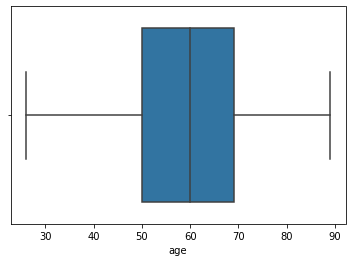

In [22]:
sns.boxplot(x=df['age'])

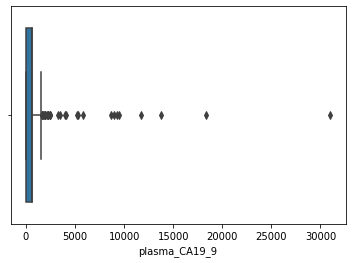

In [23]:
sns.boxplot(x=df['plasma_CA19_9'])

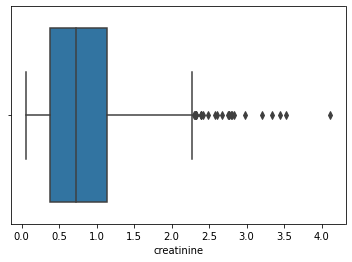

In [24]:
sns.boxplot(x=df['creatinine'])

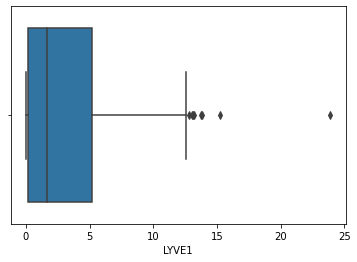

In [25]:
sns.boxplot(x=df['LYVE1'])

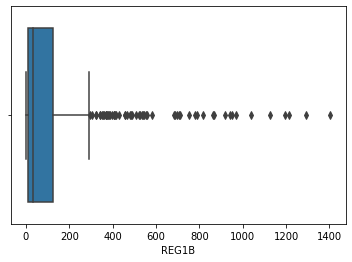

In [26]:
sns.boxplot(x=df['REG1B'])

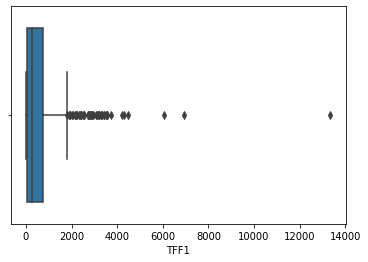

In [27]:
sns.boxplot(x=df['TFF1'])

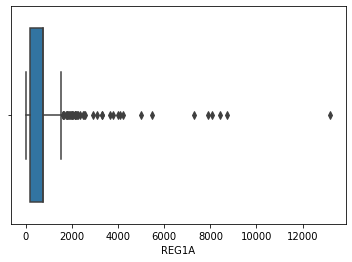

In [28]:
sns.boxplot(x=df['REG1A'])

In [29]:
# Menghapus outliers yang ada pada dataset
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
new_df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# ukuran dataset setelah drop outliers
new_df.shape

(470, 10)

### Split Dataset

Pembagian dataset ini bertujuan agar nantinya dapat digunakan untuk melatih dan mengevaluasi kinerja model. Pada proyek ini, 80% dataset digunakan untuk melatih model, dan 20% sisanya digunakan untuk mengevaluasi model.

In [30]:
# Menentukan fitur (X) dan label (y)
X = new_df.drop(["diagnosis"],axis =1)
y = new_df["diagnosis"]

# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 60)

In [31]:
# Jumlah data terkini
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 470
Total # of sample in train dataset: 376
Total # of sample in test dataset: 94


### Normalisasi

Pada proyek ini akan menggunakan MinMaxScaler, yaitu teknik normalisasi yang mentransformasikan nilai fitur atau variabel ke dalam rentang [0,1] yang berarti bahwa nilai minimum dan maksimum dari fitur/variabel masing-masing adalah 0 dan 1

In [32]:
# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

Pada tahap ini akan dibuat beberapa model diantaranya menggunakan K-Nearest Neighbor, Random Forest, Support Vector Machine Classifier, dan Naive Bayes.

In [33]:
# Menyiapkan dataframe untuk analisis model
models = pd.DataFrame(index=['accuracy_score'], 
                      columns=['KNN', 'RandomForest', 'SVM', 'Naive Bayes'])

### KNN (K-Nearest Neighbor)

In [34]:
# Buat model prediksi dengan KNN
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
# Lakukan prediksi dengan model KNN
knn_pred = model_knn.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

### Random Forest

In [36]:
# Buat model prediksi dengan Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
# Lakukan prediksi dengan model Random Forest
rf_pred = model_rf.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, rf_pred)

### Support Vector Classifier

In [38]:
# Buat model prediksi dengan Support Vector Machine Classifier
model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
# Lakukan prediksi dengan model SVM Classifier
svc_pred = model_svc.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','SVM'] = accuracy_score(y_test, svc_pred)

### Naive Bayes

In [40]:
# Buat model prediksi dengan Bernoulli Naive Bayes
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [41]:
# Lakukan prediksi dengan model Naive Bayes
nb_pred = model_nb.predict(X_test)

# Hitung metriks akurasi dan simpan hasilnya
models.loc['accuracy_score','Naive Bayes'] = accuracy_score(y_test, nb_pred)

## Evaluation

Setelah mendapatkan beberapa model, maka dapat dibandingkan akurasi prediksinya untuk mendapatkan model dengan kinerja yang terbaik. Agar lebih mudah dapat menggunakan visualisasi seperti berikut.

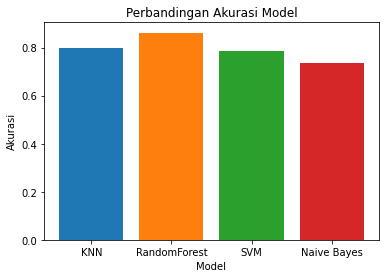

In [43]:
# Menampilkan perbandingan akurasi beberapa model yang telah dibuat
plt.bar('KNN', models['KNN'])
plt.bar('RandomForest', models['RandomForest'])
plt.bar('SVM', models['SVM'])
plt.bar('Naive Bayes', models['Naive Bayes'])
plt.title("Perbandingan Akurasi Model");
plt.xlabel('Model');
plt.ylabel('Akurasi');
plt.show()

Dari diagram batang di atas dapat diketahui bahwa model dengan Random Forest memiliki akurasi yang paling tinggi dibanding 3 model lainnya. Untuk itu, model inilah yang akan dipilih dan dipakai.

## Penutup
Saat ini model untuk memprediksi kanker pankreas telah didapatkan. Dengan model ini dapat diimplementasikan lebih lanjut menjadi aplikasi yang siap digunakan. Namun tentu saja model ini juga masih dapat disempurnakan dengan mencoba algoritma yang lain, melakukan fine-tuning, atau dengan mengubah dataset yang lebih beragam dan berkualitas.